In [ ]:
# Import Google Drive module
from google.colab import drive

# Mount Google Drive to access files within the Colab environment
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile
import os

# Source ZIP file paths
base_drive_path = "/content/drive/MyDrive/Deep Leaf Project"
zip_files = {
    "train": "train_zip.zip",
    "test": "test_zip.zip",
    "valid": "valid_zip.zip"
}

# Destination base folder
extract_base = "/content/DeepLeaf Datasets"

# Create target folder if not exists
os.makedirs(extract_base, exist_ok=True)

# Extract each zip into a subfolder
for name, zip_name in zip_files.items():
    zip_path = os.path.join(base_drive_path, zip_name)
    extract_path = os.path.join(extract_base, name)

    # Ensure clean extraction
    if os.path.exists(extract_path):
        import shutil
        shutil.rmtree(extract_path)

    # Extract
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_path)

    print(f"Extracted {zip_name} to {extract_path}")


Extracted train_zip.zip to /content/DeepLeaf Datasets/train
Extracted test_zip.zip to /content/DeepLeaf Datasets/test
Extracted valid_zip.zip to /content/DeepLeaf Datasets/valid


In [ ]:
train = "/content/DeepLeaf Datasets/train/train"
test = "/content/DeepLeaf Datasets/test/test"
valid = "/content/DeepLeaf Datasets/valid/valid"

In [ ]:
# Import NumPy for numerical operations
import numpy as np

import tensorflow as tf

# Import ImageDataGenerator for image preprocessing and data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import matplotlib.pyplot as plt


In [ ]:
# Path to validation dataset
valid = "/content/DeepLeaf Datasets/valid/valid"

# Load validation dataset from directory
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True
)

# Get the list of class names
class_name = validation_set.class_names
print("Class names:", class_name)


Found 17572 files belonging to 38 classes.
Class names: ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Sp

#**Loading Model**

In [ ]:
# Import function to load a pre-trained Keras model
from tensorflow.keras.models import load_model

model = load_model('/content/drive/MyDrive/Colab Notebooks/trained_plant_disease_model.keras')
print("Model loaded successfully.")


Model loaded successfully.


#**Visualising and Performing Prediction on Single image**

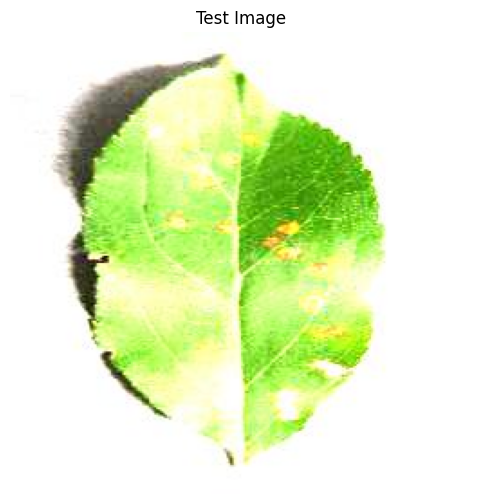

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Correct image path
image_path = '/content/DeepLeaf Datasets/test/test/test/AppleCedarRust1.JPG'

# Read the image
img = cv2.imread(image_path)

# Check if image loaded successfully
if img is None:
    print("Failed to load image. Check the file path:", image_path)
else:
    # Convert BGR to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.figure(figsize=(6, 6))
    plt.imshow(img)
    plt.title('Test Image')
    plt.axis('off')
    plt.show()


**Testing Model**

In [ ]:
import tensorflow as tf
import numpy as np

# Load and preprocess the test image
image_path = '/content/DeepLeaf Datasets/test/test/test/AppleCedarRust1.JPG'
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(128, 128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.expand_dims(input_arr, axis=0)  # Convert single image to a batch

# Make prediction using the loaded model
predictions = model.predict(input_arr)[0]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step


In [ ]:
print(predictions.shape)
print(predictions)


(38,)
[6.4142625e-08 5.1054131e-04 9.6626753e-01 9.1820319e-12 1.5058923e-02
 4.2896373e-10 2.3556349e-10 5.6877396e-09 6.6677774e-09 4.7328247e-10
 2.3312754e-17 7.1332035e-10 7.2563336e-05 3.5391886e-14 1.8580134e-13
 5.0462737e-12 4.6034545e-09 1.5111760e-10 5.6533230e-05 6.8042158e-05
 1.6485980e-12 6.5433423e-12 1.6009708e-05 1.3251628e-07 4.8438569e-11
 4.1936729e-18 3.3024390e-09 1.1807078e-09 1.6768547e-08 5.1234073e-11
 8.2680547e-09 7.3245073e-12 4.2128354e-07 1.7056366e-13 4.7098243e-04
 8.6520062e-11 1.9314493e-06 2.3096124e-08]


In [ ]:
threshold = 0.5  # adjust as needed

predicted_indices = [i for i, prob in enumerate(predictions) if prob >= threshold]

print("Detected diseases:")
for idx in predicted_indices:
    print(f"{class_name[idx]} - Probability: {predictions[idx]:.2f}")


Detected diseases:
Apple___Cedar_apple_rust - Probability: 0.97


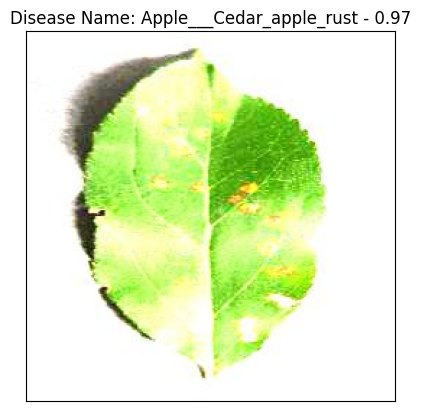

In [ ]:
# Show each detected disease
for idx in predicted_indices:
    model_prediction = class_name[idx]
    plt.imshow(img)
    plt.title(f"Disease Name: {model_prediction} - {predictions[idx]:.2f}")
    plt.xticks([])
    plt.yticks([])
    plt.show()